In [1]:
# 引入Python包，在jupyter notebook 运行后可以直接输出多个变量 注意大小写
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

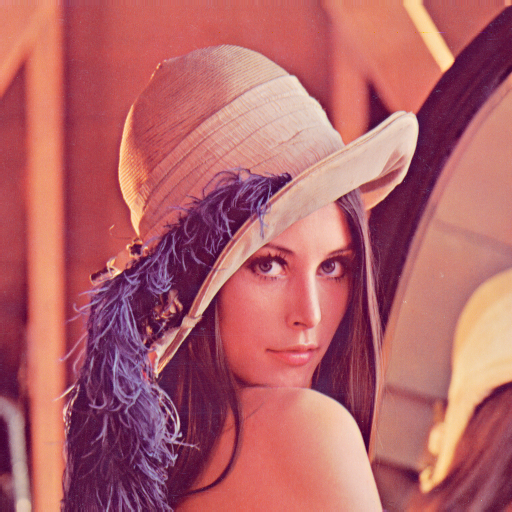

In [3]:
image_path = 'lenna.png'
img = Image.open(image_path).convert('RGB')
img

(262144,)

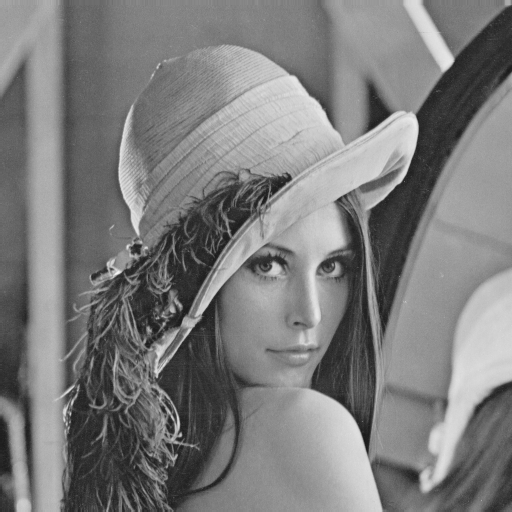

In [4]:
# PIL 直接转成 灰度图
img_gray = img.convert('L')
np.array(list(img_gray.getdata())).shape
img_gray
img_gray.save('gray_from_pil.png')

<Figure size 432x288 with 0 Axes>

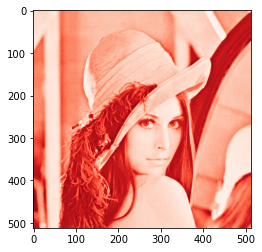

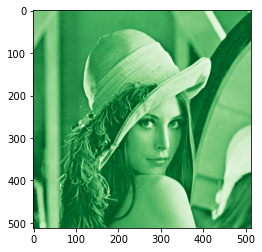

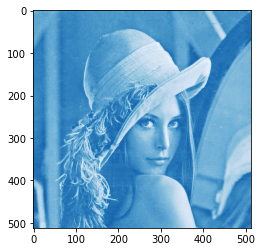

In [5]:
# 配色图：https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
plt.figure()
plt.imshow(img.getchannel(0), cmap='Reds_r')
plt.show()
plt.imshow(img.getchannel(1), cmap='Greens_r')
plt.show()
plt.imshow(img.getchannel(2), cmap='Blues_r')
# img.getchannel(0) # R
# img.getchannel(1) # G
# img.getchannel(2) # B

In [6]:
# 转灰度图
img_data = np.array(list(img.getdata()))
img_data.shape

(262144, 3)

array([162, 162, 162, ..., 104, 105, 108], dtype=uint8)

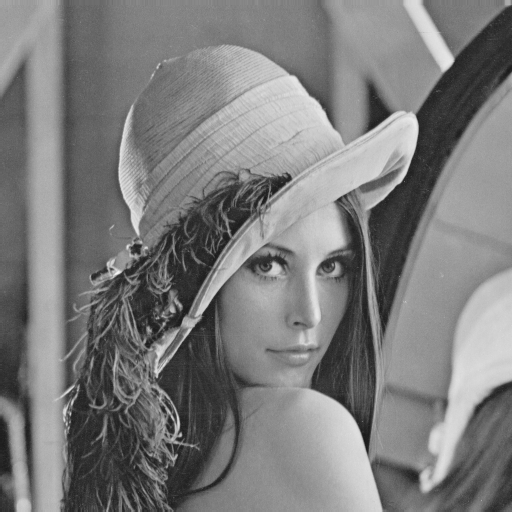

<Figure size 432x288 with 0 Axes>

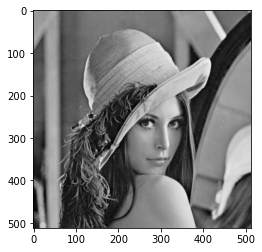

In [7]:
color_R = img_data[:, 0]
color_G = img_data[:, 1]
color_B = img_data[:, 2]

gray_data = color_R * 299/1000 + color_G * 587/1000 + color_B * 114/1000
# np.around 向最接近的值舍入，当有两个一样接近的值时采取偶数优先策略，所谓偶数，就是二进制以0结尾的数，不是数学意义上的4舍5入
# 而Pil模块里面的image convert使用的是数学意义上的4舍5入，所以这里进行灰度化之后和image模块转出来的图像还是会存在个别像素的差异
gray_data = np.uint8(np.around(gray_data)) # 取整
gray_data

image_gray = Image.fromarray(gray_data.reshape(512, 512), mode='L')
image_gray
image_gray.save('gray_by_test.png')
plt.figure()
# plt.imshow(image_gray)
plt.imshow(gray_data.reshape(512, 512), cmap='gray')

In [8]:
# R、G、B分别转二值图
bin_R = []
len(img_data[:, 0])
# bin_R = np.array([1 if i > 128 else 0 for i in img_data[:, 0]], dtype='uint8')
# bin_G = np.array([1 if i > 128 else 0 for i in img_data[:, 1]], dtype='uint8')
# bin_B = np.array([1 if i > 128 else 0 for i in img_data[:, 2]], dtype='uint8')

bin_R = np.where(img_data[:, 0] > 128, 1, 0)
bin_G = np.where(img_data[:, 1] > 128, 1, 0)
bin_B = np.where(img_data[:, 2] > 128, 1, 0)

262144

<Figure size 432x288 with 0 Axes>

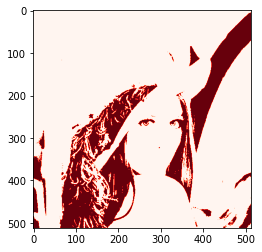

<Figure size 432x288 with 0 Axes>

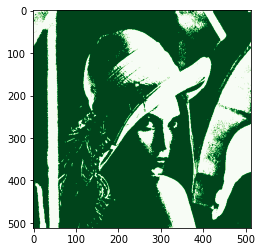

<Figure size 432x288 with 0 Axes>

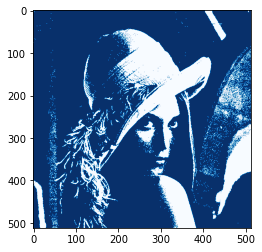

In [9]:
plt.figure()
# plt.imshow(image_gray)
plt.imshow(bin_R.reshape(512,512), cmap='Reds_r')
plt.show()
plt.figure()
# plt.imshow(image_gray)
plt.imshow(bin_G.reshape(512,512), cmap='Greens_r')
plt.show()
plt.figure()
# plt.imshow(image_gray)
plt.imshow(bin_B.reshape(512,512), cmap='Blues_r')
plt.show()

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

<Figure size 432x288 with 0 Axes>

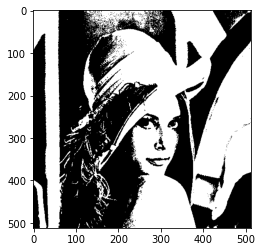

In [10]:
# 灰度图转二值图
gray_bin = np.array([1 if i > 128 else 0 for i in gray_data], dtype='uint8')
gray_bin.reshape(512, 512)
plt.figure()
plt.grid(False)
plt.imshow(gray_bin.reshape(512,512), cmap='gray')